In [1]:
! pip install numpy
! pip install pandas
! pip install seaborn
! pip install matplotlib
! pip install pingouin 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pingouin as pg
import statsmodels.formula.api as smf
from scipy import stats
#downloading neccesary packages

In [2]:
df = pd.read_csv('final_df.csv')
df["Year"] = df["Unnamed: 0"]
df = df.drop(["Unnamed: 0"], axis=1)
df = df.set_index(["Year"]).T
#getting the dataframe
#35 rows, 16 columns(2004-2019)
df

Year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Food exports (% of merchandise exports),2.788167e+01,2.567487e+01,2.491996e+01,2.622186e+01,2.743387e+01,3.389059e+01,3.012939e+01,3.022550e+01,3.183923e+01,3.392432e+01,3.502673e+01,3.713850e+01,3.670896e+01,3.564430e+01,3.366132e+01,3.387365e+01
GDP (constant 2010 US$),1.720000e+12,1.770000e+12,1.850000e+12,1.960000e+12,2.060000e+12,2.050000e+12,2.210000e+12,2.300000e+12,2.340000e+12,2.410000e+12,2.420000e+12,2.340000e+12,2.260000e+12,2.290000e+12,2.320000e+12,2.350000e+12
GDP per capita (constant 2010 US$),9.346039e+03,9.535419e+03,9.805725e+03,1.029353e+04,1.071087e+04,1.059499e+04,1.128624e+04,1.162781e+04,1.174578e+04,1.199348e+04,1.195121e+04,1.143115e+04,1.096597e+04,1.102172e+04,1.107971e+04,1.112174e+04
Forest area (sq. km),5.352854e+06,5.313346e+06,5.273839e+06,5.234331e+06,5.194823e+06,5.155315e+06,5.115807e+06,5.100415e+06,5.085023e+06,5.069632e+06,5.054240e+06,5.038848e+06,5.020821e+06,5.000916e+06,4.990514e+06,NaN
"Goods exports (BoP, current US$)",9.624064e+10,1.180000e+11,1.380000e+11,1.610000e+11,1.980000e+11,1.530000e+11,2.010000e+11,2.560000e+11,2.420000e+11,2.420000e+11,2.240000e+11,1.900000e+11,1.840000e+11,2.180000e+11,2.400000e+11,2.260000e+11
"Net trade in goods and services (BoP, current US$)",2.898951e+10,3.639427e+10,3.680424e+10,2.681296e+10,8.145874e+09,6.025626e+09,-1.166530e+10,-9.541406e+09,-2.274853e+10,-4.598361e+10,-5.473605e+10,-1.926079e+10,1.418804e+10,2.603220e+10,1.731307e+10,5.406793e+09
"Imports of goods and services (BoP, current US$)",7.899524e+10,9.661093e+10,1.190000e+11,1.580000e+11,2.200000e+11,1.750000e+11,2.440000e+11,3.020000e+11,3.040000e+11,3.260000e+11,3.190000e+11,2.430000e+11,2.030000e+11,2.270000e+11,2.580000e+11,2.550000e+11
Forest area (% of land area),6.404361e+01,6.357092e+01,6.309823e+01,6.262554e+01,6.215286e+01,6.168017e+01,6.120748e+01,6.102333e+01,6.083917e+01,6.065502e+01,6.047087e+01,6.028671e+01,6.007103e+01,5.983288e+01,5.970843e+01,NaN
"International tourism, number of arrivals",4.794000e+06,5.358000e+06,5.017000e+06,5.026000e+06,5.050000e+06,4.802000e+06,5.161000e+06,5.433000e+06,5.677000e+06,5.813000e+06,6.430000e+06,6.306000e+06,6.547000e+06,6.589000e+06,6.621000e+06,6.353000e+06
"Unemployment, total (% of total labor force) (modeled ILO estimate)",9.110000e+00,9.570000e+00,8.640000e+00,8.330000e+00,7.340000e+00,8.520000e+00,7.730000e+00,6.920000e+00,7.190000e+00,6.980000e+00,6.660000e+00,8.430000e+00,1.160000e+01,1.282000e+01,1.233000e+01,1.193000e+01


In [3]:
transposed_df = df.transpose().reset_index()
#transposed_df["Year"] = transposed_df["Year"].to_datetime()
transposed_df
#getting a transposed version of the dataframe 

,Year,Food exports (% of merchandise exports),GDP (constant 2010 US$),GDP per capita (constant 2010 US$),Forest area (sq. km),"Goods exports (BoP, current US$)","Net trade in goods and services (BoP, current US$)","Imports of goods and services (BoP, current US$)",Forest area (% of land area),"International tourism, number of arrivals",...,"Inflation, consumer prices (annual %)",Trade (% of GDP),GDP per capita growth (annual %),Gross fixed capital formation (annual % growth),Exports of goods and services (% of GDP),S&P Global Equity Indices (annual % change),Trade in services (% of GDP),Broad money (current LCU),GDP per capita growth (annual %).1,Total Deforestation
0,2004,27.881671,1.720000e+12,9346.039343,5352854.4,9.624064e+10,2.898951e+10,7.899524e+10,64.043608,4794000.0,...,6.597185,29.678252,4.497077,8.486963,16.545762,33.680000,4.241827,1.100000e+12,4.497077,27772.0
1,2005,25.674871,1.770000e+12,9535.418830,5313346.5,1.180000e+11,3.639427e+10,9.661093e+10,63.570920,5358000.0,...,6.869537,27.086795,2.026307,1.956301,15.243829,47.643703,4.311990,1.310000e+12,2.026307,19014.0
2,2006,24.919965,1.850000e+12,9805.724506,5273838.6,1.380000e+11,3.680424e+10,1.190000e+11,63.098232,5017000.0,...,4.183568,26.041700,2.834754,6.660788,14.374316,43.066594,4.211154,1.520000e+12,2.834754,14286.0
3,2007,26.221861,1.960000e+12,10293.530340,5234330.7,1.610000e+11,2.681296e+10,1.580000e+11,62.625545,5026000.0,...,3.641273,25.292611,4.974705,11.952408,13.327675,74.671633,4.375338,1.860000e+12,4.974705,11651.0
4,2008,27.433868,2.060000e+12,10710.872220,5194822.8,1.980000e+11,8.145874e+09,2.200000e+11,62.152857,5050000.0,...,5.678594,27.257569,4.054410,12.286958,13.534001,-57.178269,4.575410,2.190000e+12,4.054410,12911.0
5,2009,33.890589,2.050000e+12,10594.986590,5155314.9,1.530000e+11,6.025626e+09,1.750000e+11,61.680169,4802000.0,...,4.888035,22.105976,-1.081944,-2.133875,10.851371,125.110058,4.481200,2.540000e+12,-1.081944,7464.0
6,2010,30.129393,2.210000e+12,11286.243020,5115807.0,2.010000e+11,-1.166530e+10,2.440000e+11,61.207482,5161000.0,...,5.038727,22.772178,6.524373,17.853921,10.865585,6.500412,4.142357,2.880000e+12,6.524373,7000.0
7,2011,30.225503,2.300000e+12,11627.810650,5100415.2,2.560000e+11,-9.541406e+09,3.020000e+11,61.023328,5433000.0,...,6.636450,23.934411,3.026407,6.833269,11.582515,-24.414331,4.247790,3.360000e+12,3.026407,6418.0
8,2012,31.839229,2.340000e+12,11745.775930,5085023.4,2.420000e+11,-2.274853e+10,3.040000e+11,60.839175,5677000.0,...,5.403499,25.114294,1.014510,0.779095,11.877560,-0.269774,4.778567,3.810000e+12,1.014510,4571.0
9,2013,33.924319,2.410000e+12,11993.483980,5069631.6,2.420000e+11,-4.598361e+10,3.260000e+11,60.655021,5813000.0,...,6.204311,25.785976,2.108912,5.827338,11.742231,-19.139349,4.949567,4.190000e+12,2.108912,5891.0


In [4]:
renamed_transposed_df = transposed_df.copy()
renamed_total_deforestation = renamed_transposed_df.rename(columns = {"Food exports (% of merchandise exports)": "Food_Exports(%_of_exports)",
                                "GDP (constant 2010 US$)" : "GDP",
                                "GDP per capita (constant 2010 US$)" : "GDP_per_capita",
                                "Forest area (sq. km)": "Forest_Area(sq_km)",
                                "Goods exports (BoP, current US$)" : "Good_Exports",
                                "Net trade in goods and services (BoP, current US$)" : "Net_Trade_Goods_&_Services",
                                "Imports of goods and services (BoP, current US$)" : "Imports_Goods_&_Services",
                                "Forest area (% of land area)" : "Forest_area_%_of_land",
                                "International tourism, number of arrival" : "Number_International_Tourists",
                                "Unemployment, total (% of total labor force) (modeled ILO estimate)": "Unemployment_%_of_labor_force",
                                "Unemployment with advanced education, male (% of male labor force with advanced education)":"Male_unemployment_with_advanced_edu",
                                "GNI (current US$)" : "GNI",
                                "Gross capital formation (% of GDP)" : "Gross_capital_formation",
                                "Gross domestic savings (% of GDP)": "Gross_domestic_savings",
                                "Arable land (hectares)" : "Arable_land_(hectares)",
                                "Unemployment, male (% of male labor force) (modeled ILO estimate)": "%_male_unemployment",
                                "Gross domestic income (constant LCU)": "Gross_domestic_income",
                                "Adjusted net national income (constant 2010 US$)": "Net_Income",
                                "GDP (current LCU)": "GDP(current_LCU)",
                                "Exports of goods and services (current US$)" : "Exports_goods_&_services",
                                "Food imports (% of merchandise imports)": "Food_imports",
                                "International tourism, receipts for travel items (current US$)": "International_Tourism_Recipts",
                                "Imports of goods and services (% of GDP)":"Imports_of_goods_&_services(%_GDP)",
                                "Total debt service (% of exports of goods, services and primary income)": "Total_Debt_Service",
                                "Agricultural land (% of land area)" : "%_Agricultural_land",
                                "Inflation, consumer prices (annual %)" : "Inflation(annual%)",
                                "Trade (% of GDP)" : "Trade_%_GDP",
                                "GDP per capita growth (annual %)":"Annual_GDP_per_capita_growth",
                                "Gross fixed capital formation (annual % growth)": "Gross_fixed_capital_formation(annual_%_growth)",
                                "Exports of goods and services (% of GDP)" : "Exports_of_goods_&_services(%GDP)",
                                "S&P Global Equity Indices (annual % change)":"S&P_Global_Equity_Indices(annual_%_change)",
                                "Trade in services (% of GDP)": "Trade_in_services(%_GDP)",
                                "Broad money (current LCU)": "Broad_Money",
                                "GDP per capita growth (annual %).1" : "Annual%_GDP_pre_capita_growth",
                                "Total Deforestation":"Total_Deforestation"}, inplace = True)

In [5]:
from matplotlib.pyplot import figure
#importing anohter packag to alter size of graph

<Figure size 8e+07x8e+07 with 0 Axes>

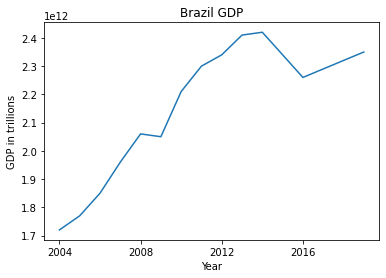

<Figure size 8e+07x8e+07 with 0 Axes>

In [6]:
df4 = renamed_transposed_df.set_index("Year")
plt.xticks([2004, 2008, 2012, 2016])
plt.title("Brazil GDP")
plt.xlabel("Year")
plt.ylabel("GDP in trillions")

df4["GDP"].plot()
figure(figsize=(1000, 1000), dpi=80000)
#making a line plot of GDP per year

<AxesSubplot:title={'center':'Total Deforestation from 2004-2019'}, xlabel='Year', ylabel='Deforestation (km)'>

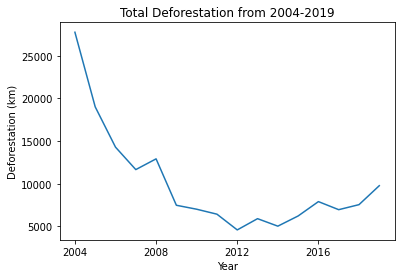

In [7]:
plt.xticks([2004, 2008, 2012, 2016])
plt.title("Total Deforestation from 2004-2019")
plt.xlabel("Year")
plt.ylabel("Deforestation (km)")
df4["Total_Deforestation"].plot()
#making a line plot of the total deforestation per year

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-37.300641,30,two-sided,1.072656e-26,"[-2284196579671.14, -2047053400286.99]",13.187768,1.11e+23,1.0


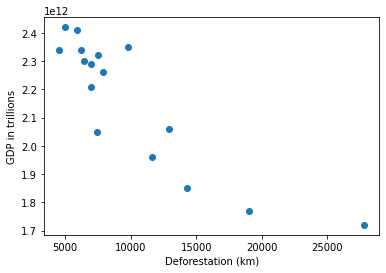

In [8]:
a = transposed_df["Total Deforestation"]
b = transposed_df["GDP (constant 2010 US$)"]
plt.scatter(a,b)
plt.show
# plt.title("GDP vs Deforestation")
plt.ylabel("GDP in trillions")
plt.xlabel("Deforestation (km)")

pg.ttest(a,b)
#t-test of deforestation vs GDP
#scatterplot of deofrestation vs GDP

In [9]:
a = transposed_df["Total Deforestation"]
c = transposed_df["GDP per capita (constant 2010 US$)"]
pg.ttest(a,c)
#t-test of gdp vs deforestation

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-0.574686,30,two-sided,0.569789,"[-4034.71, 2262.66]",0.203182,0.382,0.086165


In [10]:
a = transposed_df["Total Deforestation"]
d = transposed_df["Exports of goods and services (current US$)"]
pg.ttest(a,d)
#t-test of exports vs deforestation

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-15.609941,30,two-sided,6.049533e-16,"[-258465669398.58, -198659310559.54]",5.518948,5.133e+12,1.0


In [11]:
e = transposed_df["International tourism, number of arrivals"]
pg.ttest(a,e)
#t-test of tourism vs deforestation

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-32.902181,30,two-sided,4.239617e-25,"[-6028359.34, -5323723.78]",11.632678,3.201e+21,1.0


In [12]:
transposed_df

,Year,Food exports (% of merchandise exports),GDP (constant 2010 US$),GDP per capita (constant 2010 US$),Forest area (sq. km),"Goods exports (BoP, current US$)","Net trade in goods and services (BoP, current US$)","Imports of goods and services (BoP, current US$)",Forest area (% of land area),"International tourism, number of arrivals",...,"Inflation, consumer prices (annual %)",Trade (% of GDP),GDP per capita growth (annual %),Gross fixed capital formation (annual % growth),Exports of goods and services (% of GDP),S&P Global Equity Indices (annual % change),Trade in services (% of GDP),Broad money (current LCU),GDP per capita growth (annual %).1,Total Deforestation
0,2004,27.881671,1.720000e+12,9346.039343,5352854.4,9.624064e+10,2.898951e+10,7.899524e+10,64.043608,4794000.0,...,6.597185,29.678252,4.497077,8.486963,16.545762,33.680000,4.241827,1.100000e+12,4.497077,27772.0
1,2005,25.674871,1.770000e+12,9535.418830,5313346.5,1.180000e+11,3.639427e+10,9.661093e+10,63.570920,5358000.0,...,6.869537,27.086795,2.026307,1.956301,15.243829,47.643703,4.311990,1.310000e+12,2.026307,19014.0
2,2006,24.919965,1.850000e+12,9805.724506,5273838.6,1.380000e+11,3.680424e+10,1.190000e+11,63.098232,5017000.0,...,4.183568,26.041700,2.834754,6.660788,14.374316,43.066594,4.211154,1.520000e+12,2.834754,14286.0
3,2007,26.221861,1.960000e+12,10293.530340,5234330.7,1.610000e+11,2.681296e+10,1.580000e+11,62.625545,5026000.0,...,3.641273,25.292611,4.974705,11.952408,13.327675,74.671633,4.375338,1.860000e+12,4.974705,11651.0
4,2008,27.433868,2.060000e+12,10710.872220,5194822.8,1.980000e+11,8.145874e+09,2.200000e+11,62.152857,5050000.0,...,5.678594,27.257569,4.054410,12.286958,13.534001,-57.178269,4.575410,2.190000e+12,4.054410,12911.0
5,2009,33.890589,2.050000e+12,10594.986590,5155314.9,1.530000e+11,6.025626e+09,1.750000e+11,61.680169,4802000.0,...,4.888035,22.105976,-1.081944,-2.133875,10.851371,125.110058,4.481200,2.540000e+12,-1.081944,7464.0
6,2010,30.129393,2.210000e+12,11286.243020,5115807.0,2.010000e+11,-1.166530e+10,2.440000e+11,61.207482,5161000.0,...,5.038727,22.772178,6.524373,17.853921,10.865585,6.500412,4.142357,2.880000e+12,6.524373,7000.0
7,2011,30.225503,2.300000e+12,11627.810650,5100415.2,2.560000e+11,-9.541406e+09,3.020000e+11,61.023328,5433000.0,...,6.636450,23.934411,3.026407,6.833269,11.582515,-24.414331,4.247790,3.360000e+12,3.026407,6418.0
8,2012,31.839229,2.340000e+12,11745.775930,5085023.4,2.420000e+11,-2.274853e+10,3.040000e+11,60.839175,5677000.0,...,5.403499,25.114294,1.014510,0.779095,11.877560,-0.269774,4.778567,3.810000e+12,1.014510,4571.0
9,2013,33.924319,2.410000e+12,11993.483980,5069631.6,2.420000e+11,-4.598361e+10,3.260000e+11,60.655021,5813000.0,...,6.204311,25.785976,2.108912,5.827338,11.742231,-19.139349,4.949567,4.190000e+12,2.108912,5891.0


In [13]:
renamed_transposed_df.head()

,Year,Food_Exports(%_of_exports),GDP,GDP_per_capita,Forest_Area(sq_km),Good_Exports,Net_Trade_Goods_&_Services,Imports_Goods_&_Services,Forest_area_%_of_land,"International tourism, number of arrivals",...,Inflation(annual%),Trade_%_GDP,Annual_GDP_per_capita_growth,Gross_fixed_capital_formation(annual_%_growth),Exports_of_goods_&_services(%GDP),S&P_Global_Equity_Indices(annual_%_change),Trade_in_services(%_GDP),Broad_Money,Annual%_GDP_pre_capita_growth,Total_Deforestation
0,2004,27.881671,1.720000e+12,9346.039343,5352854.4,9.624064e+10,2.898951e+10,7.899524e+10,64.043608,4794000.0,...,6.597185,29.678252,4.497077,8.486963,16.545762,33.680000,4.241827,1.100000e+12,4.497077,27772.0
1,2005,25.674871,1.770000e+12,9535.418830,5313346.5,1.180000e+11,3.639427e+10,9.661093e+10,63.570920,5358000.0,...,6.869537,27.086795,2.026307,1.956301,15.243829,47.643703,4.311990,1.310000e+12,2.026307,19014.0
2,2006,24.919965,1.850000e+12,9805.724506,5273838.6,1.380000e+11,3.680424e+10,1.190000e+11,63.098232,5017000.0,...,4.183568,26.041700,2.834754,6.660788,14.374316,43.066594,4.211154,1.520000e+12,2.834754,14286.0
3,2007,26.221861,1.960000e+12,10293.530340,5234330.7,1.610000e+11,2.681296e+10,1.580000e+11,62.625545,5026000.0,...,3.641273,25.292611,4.974705,11.952408,13.327675,74.671633,4.375338,1.860000e+12,4.974705,11651.0
4,2008,27.433868,2.060000e+12,10710.872220,5194822.8,1.980000e+11,8.145874e+09,2.200000e+11,62.152857,5050000.0,...,5.678594,27.257569,4.054410,12.286958,13.534001,-57.178269,4.575410,2.190000e+12,4.054410,12911.0


In [14]:
transformed_GDP, lambda_GDP = stats.boxcox(renamed_transposed_df['GDP'])
#display(transformed_GDP)
lambda_GDP

5.7688329565577865

In [15]:
transformed_deforestation, lambda_deforestation = stats.boxcox(renamed_transposed_df['Total_Deforestation'])
#display(transformed_deforestation)
lambda_deforestation

-0.886387112005214

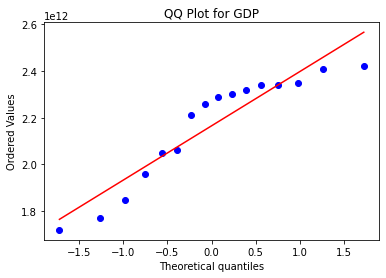

In [16]:
stats.probplot(x=renamed_transposed_df['GDP'], dist="norm", plot=plt)
plt.title("QQ Plot for GDP")
plt.show()
#QQ plot of GDP

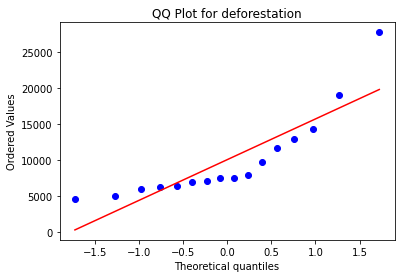

In [17]:
stats.probplot(x=renamed_transposed_df['Total_Deforestation'], dist="norm", plot=plt)
plt.title("QQ Plot for deforestation")
plt.show()
#QQ plot of deforestation

In [18]:
r2_test = smf.ols('GDP ~ Total_Deforestation' , data = renamed_transposed_df).fit()
r2_test.summary()
#regression test the effect deforestation had on GDP

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     47.01
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           7.86e-06
Time:                        14:09:07   Log-Likelihood:                -429.15
No. Observations:                  16   AIC:                             862.3
Df Residuals:                      14   BIC:                             863.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              2.5e+12   5.66e+10     44.157      0.000    2.38e+12    2.62e+12
Total_Deforestation -3.335e+07   4.86e+06     -6.856      0.000   -4.38e+07   -2.29e+07
==============================================================================
Omnibus:                        0.717   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.723
Skew:                          -0.345   Prob(JB):                        0.697
Kurtosis:                       2.220   Cond. No.                     2.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
r2_test = smf.ols('GNI ~ Total_Deforestation' , data = renamed_transposed_df).fit()
r2_test.summary()
#regression test the effect deforestation had on GNI (Gross net income)

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GNI   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     49.45
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           5.94e-06
Time:                        14:09:07   Log-Likelihood:                -443.09
No. Observations:                  16   AIC:                             890.2
Df Residuals:                      14   BIC:                             891.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.592e+12   1.35e+11     19.150      0.000     2.3e+12    2.88e+12
Total_Deforestation -8.178e+07   1.16e+07     -7.032      0.000   -1.07e+08   -5.68e+07
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.024
Skew:                           0.208   Prob(JB):                        0.599
Kurtosis:                       1.832   Cond. No.                     2.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
r2_test = smf.ols('Good_Exports ~ Total_Deforestation' , data = renamed_transposed_df).fit()
r2_test.summary()
#regression test the effect deforestation had on exports

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Good_Exports   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     29.00
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           9.62e-05
Time:                        14:09:08   Log-Likelihood:                -406.70
No. Observations:                  16   AIC:                             817.4
Df Residuals:                      14   BIC:                             818.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.575e+11   1.39e+10     18.499      0.000    2.28e+11    2.87e+11
Total_Deforestation -6.441e+06    1.2e+06     -5.385      0.000   -9.01e+06   -3.88e+06
==============================================================================
Omnibus:                        0.750   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.731
Skew:                          -0.310   Prob(JB):                        0.694
Kurtosis:                       2.156   Cond. No.                     2.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
r2_test = smf.ols('International_Tourism_Recipts ~ Total_Deforestation ' , data = renamed_transposed_df).fit()
r2_test.summary()
#regression test the effect deforestation had tourism 

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     International_Tourism_Recipts   R-squared:                       0.811
Model:                                       OLS   Adj. R-squared:                  0.798
Method:                            Least Squares   F-statistic:                     60.14
Date:                           Tue, 10 Aug 2021   Prob (F-statistic):           1.96e-06
Time:                                   14:09:08   Log-Likelihood:                -340.17
No. Observations:                             16   AIC:                             684.3
Df Residuals:                                 14   BIC:                             685.9
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.959e+09   2.18e+08     31.965      0.000    6.49e+09    7.43e+09
Total_Deforestation -1.451e+05   1.87e+04     -7.755      0.000   -1.85e+05   -1.05e+05
==============================================================================
Omnibus:                        1.230   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                0.784
Skew:                          -0.023   Prob(JB):                        0.676
Kurtosis:                       1.917   Cond. No.                     2.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

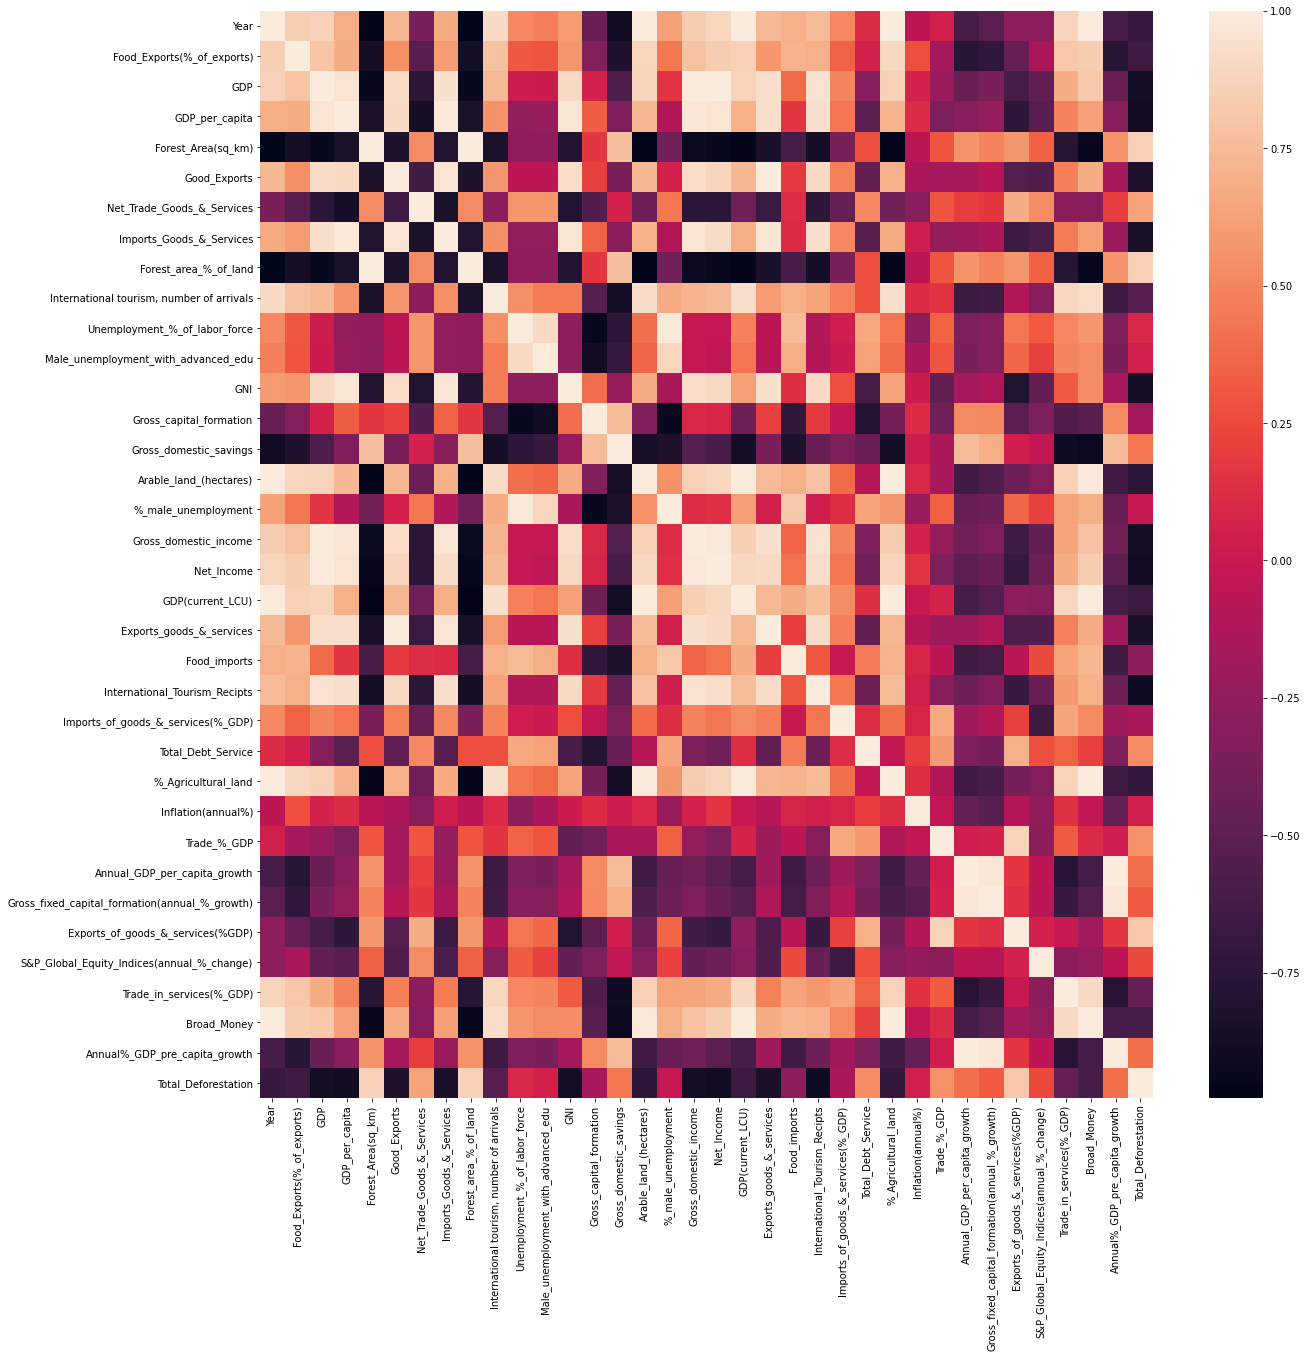

In [22]:
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(renamed_transposed_df.corr(), annot_kws={"fontsize":100})
sns.set(font_scale=2)
#Correlation heat map of all variables in the dataframe 

In [23]:
small_df1 = renamed_transposed_df[["GDP","Good_Exports","Imports_Goods_&_Services","Annual_GDP_per_capita_growth","Total_Deforestation"]]
small_df1.head()
#making a smaller df with significant variables

,GDP,Good_Exports,Imports_Goods_&_Services,Annual_GDP_per_capita_growth,Total_Deforestation
0,1.720000e+12,9.624064e+10,7.899524e+10,4.497077,27772.0
1,1.770000e+12,1.180000e+11,9.661093e+10,2.026307,19014.0
2,1.850000e+12,1.380000e+11,1.190000e+11,2.834754,14286.0
3,1.960000e+12,1.610000e+11,1.580000e+11,4.974705,11651.0
4,2.060000e+12,1.980000e+11,2.200000e+11,4.054410,12911.0


<AxesSubplot:>

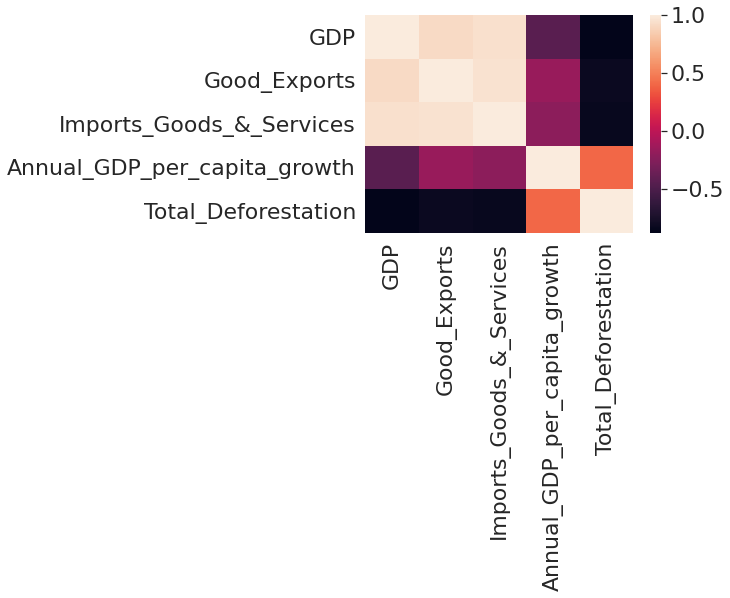

In [24]:
sns.heatmap(small_df1.corr())
#making a correlation heatmap of the significant variables mentioned above